# Links
- Full guide: https://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/
- Librosa: https://librosa.org/doc/latest/index.html

In [1]:
import os
import matplotlib.pyplot as plt # Required for librosa.display
import librosa
import librosa.display # This needs to be imported separately
import numpy as np

# Load datafiles from disk

In [2]:
data_path_male = os.getcwd() + "/data/cmu_us_bdl_arctic-WAVEGG/cmu_us_bdl_arctic/orig/"
data_path_female = os.getcwd() + "/data/cmu_us_slt_arctic-WAVEGG/cmu_us_slt_arctic/orig/"

male_sample_files = os.listdir(data_path_male)
female_sample_files = os.listdir(data_path_female)

In [40]:
# Load 5 male voice samples
Y_male = [None] * 5
SR_male = [None] * 5
for i in range(1, 5):
    Y_male[i], SR_male[i] = librosa.load(data_path_male + male_sample_files[i])

# Load 5 female voice samples
Y_fem = [None] * 5
SR_fem = [None] * 5
for i in range(1, 5):
    Y_fem[i], SR_fem[i] = librosa.load(data_path_male + female_sample_files[i])

# Extract features and display data

In [33]:
#https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html
j = 1
spectrogram = librosa.feature.melspectrogram(y=Y_fem[j], sr=SR_fem[j])

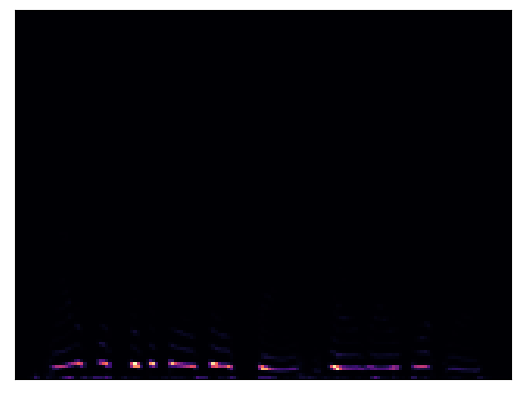

In [34]:
# x -> time
# y -> pitch
# color -> vo
librosa.display.specshow(spectrogram)

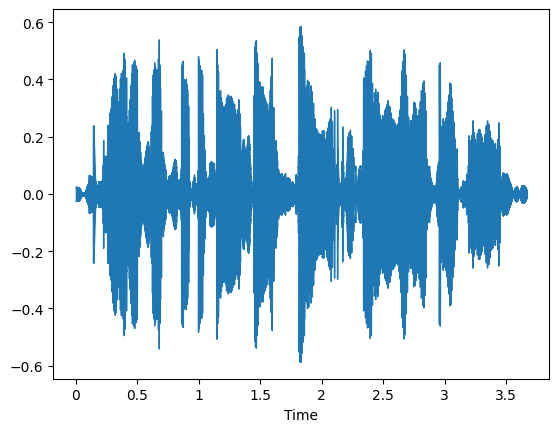

In [35]:
librosa.display.waveshow(y=Y_fem[j], sr=SR_fem[j])

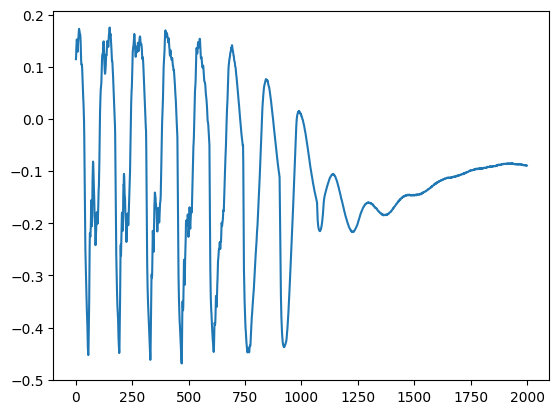

In [41]:
# Plot only a part of the data
plt.plot(Y_male[1][10000:12000])

# Fourier Transform test

In [52]:
signal_ffts_fem1 = librosa.core.stft(Y_fem[1])
signal_ffts_fem2 = librosa.core.stft(Y_fem[2])

signal_ffts_male1 = librosa.core.stft(Y_male[1])
signal_ffts_male2 = librosa.core.stft(Y_male[2])

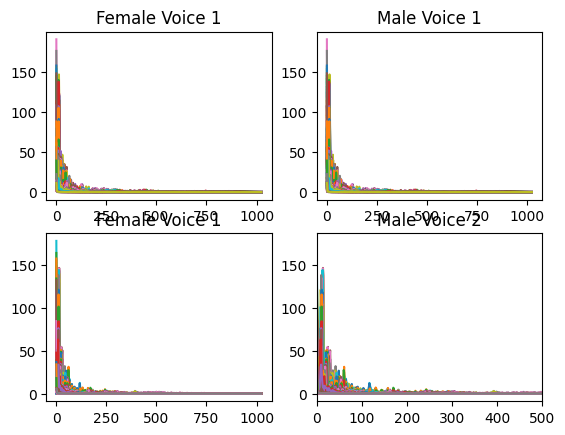

In [68]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(np.abs(signal_ffts_fem1))
axis[0, 0].set_title("Female Voice 1")
axis[1, 0].plot(np.abs(signal_ffts_fem2))
axis[1, 0].set_title("Female Voice 1")

axis[0, 1].plot(np.abs(signal_ffts_male1))
axis[0, 1].set_title("Male Voice 1")
axis[1, 1].plot(np.abs(signal_ffts_male2))
axis[1, 1].set_title("Male Voice 2")

plt.xlim([0, 500])


plt.show()

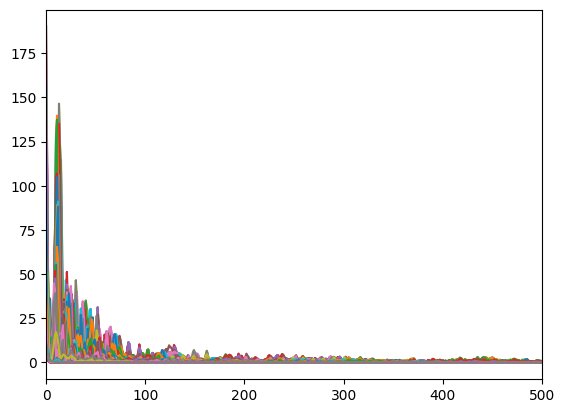

In [51]:
fig = plt.figure()

sp1 = plt.plot(np.abs(signal_ffts_fem))
# Limit the plotted range
#sp1.xlim([0, 500])
# plt.ylim([0, 25])

sp2 = plt.plot(np.abs(signal_ffts_male))
# Limit the plotted range
plt.xlim([0, 500])

plt.show()

In [22]:
plt.plot(np.abs(np.real(signal_ffts[2])), np.abs(np.imag(signal_ffts[2])))

(1025, 145)

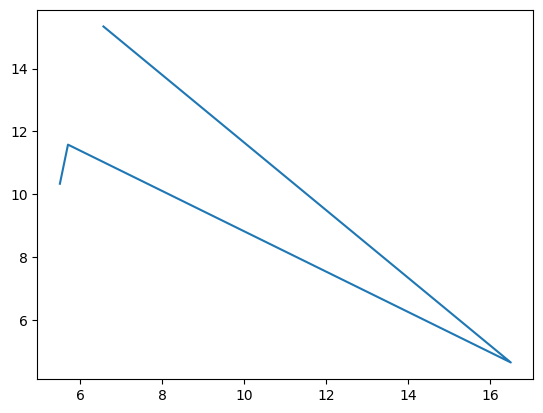

In [19]:
# np.imag
# Return the imaginary part of the complex argument.
# np. real
# Return the real part of the complex argument.
plt.plot(np.abs(np.real(signal_ffts[2])), np.abs(np.imag(signal_ffts[2])))

In [48]:
librosa.feature.chroma_stft(y = y, sr = sr)

array([[0.83497566, 0.6276566 , 0.6635365 , ..., 0.8975469 , 0.8341217 ,
        0.8150858 ],
       [0.90842   , 0.74575204, 0.76936656, ..., 1.        , 1.        ,
        0.96663964],
       [0.9357026 , 0.8619631 , 0.8699201 , ..., 0.9475557 , 0.99755394,
        1.        ],
       ...,
       [0.8458699 , 0.6722761 , 0.6759004 , ..., 0.7051781 , 0.54434323,
        0.71107376],
       [0.78082865, 0.55059296, 0.577042  , ..., 0.82527524, 0.6659177 ,
        0.7138154 ],
       [0.7764521 , 0.5112905 , 0.5367612 , ..., 0.8923016 , 0.76513195,
        0.74098694]], dtype=float32)

In [52]:
librosa.feature.spectral_rolloff(y = y, sr = sr)

array([[3768.31054688,  979.76074219,   43.06640625,   21.53320312,
          32.29980469,   21.53320312,  150.73242188,  139.96582031,
         215.33203125, 7181.32324219, 3983.64257812, 1701.12304688,
        1754.95605469, 1636.5234375 , 1399.65820312, 1614.99023438,
        1884.15527344, 1485.79101562,  936.69433594,  818.26171875,
         764.42871094,  592.16308594, 1464.2578125 , 1119.7265625 ,
         893.62792969, 1098.19335938, 1604.22363281, 2110.25390625,
        2153.3203125 , 2239.453125  , 5458.66699219, 7579.6875    ,
        8021.11816406, 7149.0234375 , 1948.75488281, 1195.09277344,
        1184.32617188, 1141.25976562, 1281.22558594, 1399.65820312,
         872.09472656,  506.03027344, 1076.66015625, 1119.7265625 ,
         269.16503906, 1668.82324219, 2777.78320312, 3025.41503906,
        3079.24804688, 2863.91601562, 2271.75292969, 1636.5234375 ,
        1399.65820312, 1421.19140625, 1776.48925781, 1561.15722656,
        1324.29199219, 1173.55957031,  936.69433

In [49]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


In [50]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [51]:
beat_times

array([0.55727891, 1.09133787, 1.64861678, 2.20589569])